In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_csv = pd.read_csv('google_review_ratings.csv')



## data preprocessor
發現category 11有一個元素長得很奇怪（2/t2），所以經過搜尋後把他的直替換成2

In [3]:
data_csv['Category 24'].fillna(data_csv['Category 24'].mean(), inplace = True) 
data_csv['Unnamed: 25'].fillna(-1, inplace = True)
data_csv['Category 12'].fillna(data_csv['Category 24'].mean(), inplace = True)
'''
for i in range(len(data_csv['Category 11'])):
    try:
        print(float(data_csv['Category 11'][i]))
    except:
        print('except: ', data_csv['Category 11'][i])
        print(i)
'''
data_csv['Category 11'][2712] = 2


<ipython-input-3-17e5051e74fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv['Category 11'][2712] = 2


## analyze data

In [4]:
print(data_csv.describe())
print(data_csv.info())
print(data_csv.head())
print()


        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min       1.11000    

### 觀察結果: 可以發現museum(Category 7 )的平均分數最高，游泳池(Category 18)的平均值最小

### 猜想：會不會有一些項目是因為有人沒有評分所以都得到0.0的平價，導致結果平均的誤差
### 結論：除了最後一個Unnamed以外其餘影響結果很小

In [5]:
#列出所有為0的個數
for x  in range(1, 25):
    s = 'Category ' + str(x)
    count = 0
    for i in data_csv[s]:
        if(i == 0.0):
            count += 1
    print('Category:',str(x), count)
s = 'Unnamed: 25'
count = 0
for i in data_csv[s]:
    if(i == -1):
        count += 1
print('Unnamed: ',count)
#print(data_csv[s].head())

Category: 1 195
Category: 2 90
Category: 3 4
Category: 4 0
Category: 5 0
Category: 6 0
Category: 7 0
Category: 8 0
Category: 9 0
Category: 10 0
Category: 11 0
Category: 12 0
Category: 13 0
Category: 14 0
Category: 15 4
Category: 16 112
Category: 17 479
Category: 18 1017
Category: 19 1046
Category: 20 896
Category: 21 604
Category: 22 345
Category: 23 302
Category: 24 225
Unnamed:  5454


## 分佈圖
以0.5為區間的分佈圖

Category: 1 [ 195. 1413. 1941.  780.  718.  210.    4.   64.   39.   25.   67.]
Category: 2 [  90.  614. 1362.  734.  950.  540.   31.  139.   27.   89.  880.]
Category: 3 [   4.   84. 1131. 1300. 1039.  711.  107.  135.   72.   60.  813.]
Category: 4 [   0.    5.  890. 1131.  756. 1008.  213.   60.  253.   73. 1067.]
Category: 5 [   0.    0.  695. 1250.  417. 1014.  442.   85.  243.   76. 1234.]
Category: 6 [   0.    0.  676. 1244.  584.  783.  754.   91.  209.   70. 1045.]
Category: 7 [   0.    0.  454. 1015.  528.  411.  845.   42.  102.  119. 1940.]
Category: 8 [   0.   63.  810. 1560.  434.  943.  681.  214.  286.   48.  417.]
Category: 9 [   0.   40.  468. 1064.  393. 1154.  481.  160.  148.   74. 1474.]
Category: 10 [   0.  148.  638. 1051.  469. 1271.  502.  231.   22.   59. 1065.]
Category: 11 [   0.  452.  581. 1689.  633.  646.  211.  108.   71.   19. 1046.]
Category: 12 [   0.  929.  887. 1786.  650.  363.    4.  193.    1.   51.  592.]
Category: 13 [   0. 1095. 1049. 1701.

"\ns = 'Unnamed: 25'\ncount = 0\nfor i in data_csv[s]:\n    count_array = np.zeros(11)\n    for i in data_csv[s]:\n        if(i == -1.0):\n            pass\n        else:\n            count_array[int(i//0.5)] += 1\nprint('Unnamed: ',count_array)\n#print(data_csv[s].head())\n"

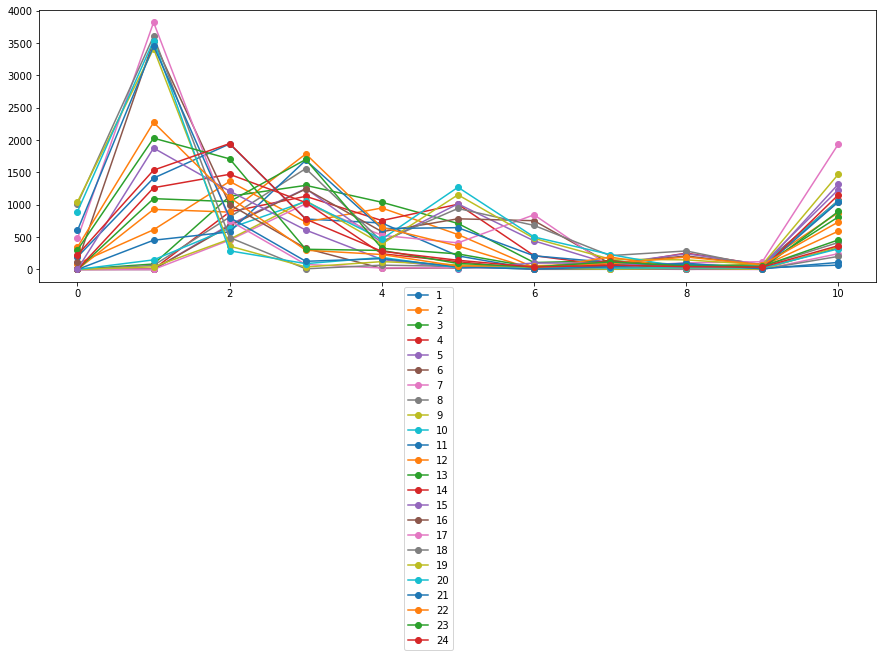

In [6]:
plt.figure(figsize = (15, 5))
for x  in range(1, 25):
    s = 'Category ' + str(x)
    count_array = np.zeros(11)
    for i in data_csv[s]:
        if(isinstance(type(data_csv[s][0]) , (object))):
            i = float(i)
            #np.printoptions(precision=3, suppress=True)
            np.set_printoptions(suppress = True)
            count_array[int(i//0.5)] += 1
        else:
            np.set_printoptions(suppress = True)
            #np.printoptions(precision=3, suppress=True)
            count_array[int(i//0.5)] += 1
        #print(i//0.5)
    plt.plot(range(11), count_array, marker = 'o', label = str(x))
    print('Category:',str(x), count_array)
plt.legend(bbox_to_anchor=(0.5, 0))
## 因為unnamed缺失資料過多，所以不打算計算    
'''
s = 'Unnamed: 25'
count = 0
for i in data_csv[s]:
    count_array = np.zeros(11)
    for i in data_csv[s]:
        if(i == -1.0):
            pass
        else:
            count_array[int(i//0.5)] += 1
print('Unnamed: ',count_array)
#print(data_csv[s].head())
'''


In [7]:
print(data_csv.shape)


(5456, 26)


## reasonable problem
### 觀察圖形之後，可以發現Category 24有類似的圖形波動
### 假設人都會有習慣性，以及一些愛屋及烏的特性，例如喜歡A和B的就會比較喜歡C。以此為基準點，去計算與預測所有人對於beaches(Category 4)的喜好程度。算好之後，測試是否有scalability。
### 希望可以得到人的喜好程度是有相慣性的，作法為以其中一個columns為預測目標，其他columns當feature去做分類預測，ㄗㄨㄟ

## data preprocessor for classifier

把所有值都除以0.5並無條件捨棄

In [8]:
#data_array = np.zeros(5426*26).reshape(5425, 26)
data = pd.DataFrame()
for x  in range(1, 25):
    s = 'Category ' + str(x)
    series_l = []
    for i in range(len(data_csv[s])):
        if(isinstance(type(data_csv[s][0]) , (object))):
            data_csv[s][i] = float(data_csv[s][i])
            #np.set_printoptions(suppress = True)
            #print(int(data_csv[s][i]//0.5))
            series_l.append(int(data_csv[s][i]//0.5))
        else:
            #np.set_printoptions(suppress = True)
            series_l.append(int(data_csv[s][i]//0.5))
    data[s] = series_l
    #print('Category:',str(x), data_array[s])
print(data.describe())

<ipython-input-8-244fc290b0a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv[s][i] = float(data_csv[s][i])


        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      2.425953     4.218475     4.543622     5.185301     5.515579   
std       1.676171     3.001362     2.684293     2.832173     2.880341   
min       0.000000     0.000000     0.000000     1.000000     2.000000   
25%       1.000000     2.000000     3.000000     3.000000     3.000000   
50%       2.000000     3.000000     4.000000     4.000000     5.000000   
75%       3.000000     5.000000     5.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

        Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      5.360704     6.372984     4.634897     5.884531     5.277493  ...   
std       2.747489     3.049364     2.327405     2.895024     2.760062  ...   
min       2.00000

['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24']


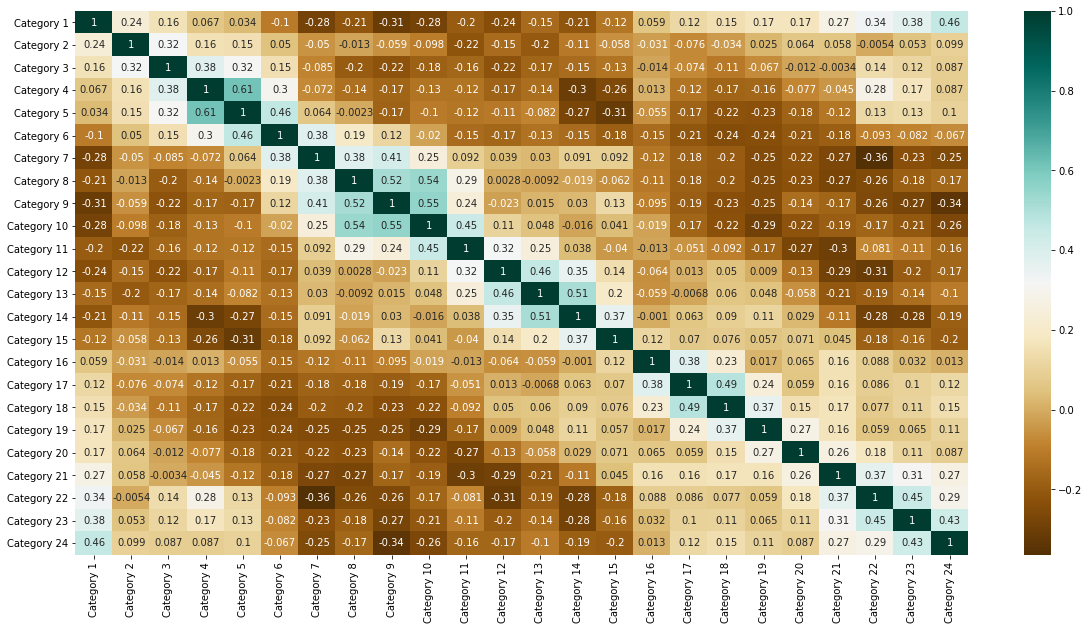

In [9]:
top_l= []
for i in range(1,25):
    t = 'Category ' + str(i)
    top_l.append(t)
print(top_l)
plt.figure(figsize=(20,10))
g = sns.heatmap(data[top_l].corr(),cmap="BrBG",annot=True)

### 先使用Dicision Tree去做分析

In [10]:
train = data.drop(['Category 4'], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score     
train_x, test_x, train_y, test_y = train_test_split(
     data.drop(['Category 4'], axis = 1), data['Category 4'] , test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
model.fit(train_x, train_y)           # 訓練決策樹模型
predict_y = model.predict(test_x)

print('final ', accuracy_score(test_y, predict_y))

final  0.7957875457875457


### 結論： 人的喜好似乎真的有一些規則可尋，愛屋及烏的習慣似乎真的被證明了


## improvement
## 擔心會overfitting，所以增加cross validtation

In [11]:
train = data.drop(['Category 4'], axis = 1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
     data.drop(['Category 4'], axis = 1), data['Category 4'] , test_size=0.2, random_state=42)

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)   # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []   

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型

    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

predict_y = model.predict(test_x)
print('final ', accuracy_score(test_y, predict_y))

average train accuracy: 0.986537563618836
    min train accuracy: 0.9853910054425666
    max train accuracy: 0.9876826124319679
average valid accuracy: 0.7859784356379457
    min valid accuracy: 0.7743413516609393
    max valid accuracy: 0.7958715596330275
final  0.7857142857142857


## improve the result
### 問題： 似乎有嚴重的overfitting，所以改用model random forest，並且升高樹的數量


In [12]:
train = data.drop(['Category 4'], axis = 1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
     data.drop(['Category 4'], axis = 1), data['Category 4'] , test_size=0.2, random_state=42)

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)   # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []   

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    
    rf = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 300,
                               min_samples_split = 20,
                               oob_score = True,
                               random_state = 4000)
    
    rf.fit(train_x_split, train_y_split)


    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

predict_y = model.predict(test_x)
print('final ', accuracy_score(test_y, predict_y))

average train accuracy: 0.9486687581189791
    min train accuracy: 0.9375537095388141
    max train accuracy: 0.9868270332187858
average valid accuracy: 0.9486359385016343
    min valid accuracy: 0.7958715596330275
    max valid accuracy: 0.993127147766323
final  0.7857142857142857


### 結論：似乎比較沒有overfitting，但預測結果是差不多的
### 測試是否有scalability

In [13]:
for x  in range(1, 25):
    s = 'Category ' + str(x)

    train_x, test_x, train_y, test_y = train_test_split(
         data.drop(s, axis = 1), data[s] , test_size=0.2, random_state=42)
    
    rf = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 300,
                               min_samples_split = 20,
                               oob_score = True)
    rf.fit(train_x, train_y)
    predict_y = rf.predict(test_x)
    
    print('final drop ',s, accuracy_score(test_y, predict_y))

final drop  Category 1 0.8690476190476191
final drop  Category 2 0.7774725274725275
final drop  Category 3 0.8122710622710623
final drop  Category 4 0.8388278388278388
final drop  Category 5 0.8287545787545788
final drop  Category 6 0.8159340659340659
final drop  Category 7 0.8186813186813187
final drop  Category 8 0.8186813186813187
final drop  Category 9 0.8397435897435898
final drop  Category 10 0.8379120879120879
final drop  Category 11 0.8424908424908425
final drop  Category 12 0.8754578754578755
final drop  Category 13 0.8415750915750916
final drop  Category 14 0.8626373626373627
final drop  Category 15 0.8021978021978022
final drop  Category 16 0.8653846153846154
final drop  Category 17 0.8836996336996337
final drop  Category 18 0.8901098901098901
final drop  Category 19 0.8772893772893773
final drop  Category 20 0.8534798534798534
final drop  Category 21 0.891941391941392
final drop  Category 22 0.8534798534798534
final drop  Category 23 0.8562271062271062
final drop  Category 

### 結論，有延展性